# IBM HR Analytics Employee Attrition & Performance

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education :
 'Below College' ,
 'College' ,
 'Bachelor' ,
 'Master' ,
 'Doctor'

EnvironmentSatisfaction :
 'Low' ,
 'Medium' ,
 'High' ,
 'Very High' 

JobInvolvement :
 'Low' ,
 'Medium' ,
 'High' ,
 'Very High'

JobSatisfaction :
 'Low' ,
 'Medium' ,
 'High',
 'Very High'

PerformanceRating
 'Low' ,
 'Good' ,
 'Excellent' ,
 'Outstanding'

RelationshipSatisfaction :
 'Low' ,
 'Medium' ,
 'High' ,
 'Very High'

WorkLifeBalance :
 'Bad' ,
 'Good' ,
 'Better' ,
 'Best'

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import sklearn 
import scipy
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")

# Reading dataset

In [41]:
df = pd.read_csv('IBM HR Analytics Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
df.shape

(1470, 35)

# Data perprocessing & EDA

In [43]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [44]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 1470

Number of features: 35

Features:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Missing values: 0

Unique values:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
Em

In [45]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Dividing the columns into 2 categories (continuous and categorical)

In [46]:
cat =[]
con=[]
for i in df.columns:
    if df[i].dtypes == "object":
        cat.append(i)
    else:
        con.append(i)

In [47]:
df.describe().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [48]:
cat_df=df[['Attrition','BusinessTravel','Department','Over18','Gender','OverTime','JobRole','MaritalStatus','EducationField']]

In [49]:
con_df=df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EmployeeNumber', 'EnvironmentSatisfaction',
           'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel',
           'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [50]:
# check for missing values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
# statistical measures of the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


it seems that some of columns are not normalised 

# visiualizing the data

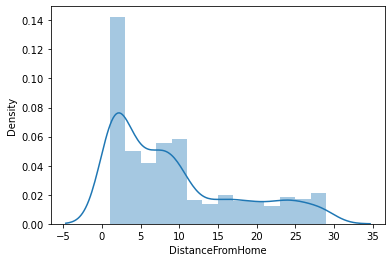

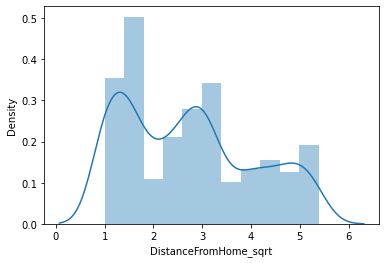

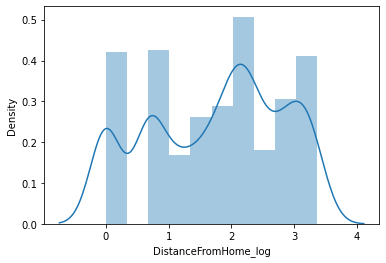

In [90]:
sb.distplot(df.DistanceFromHome)
plt.show()
df['DistanceFromHome_sqrt']=np.sqrt(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_sqrt)
plt.show()
df['DistanceFromHome_log']=np.log(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_log)
plt.show()


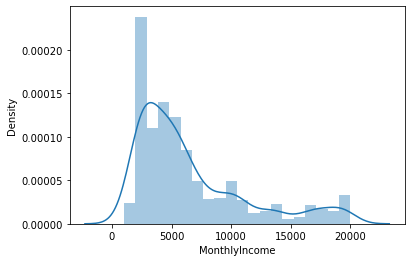

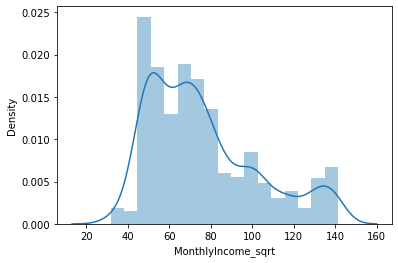

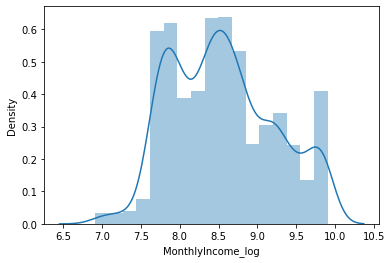

In [91]:
sb.distplot(df.MonthlyIncome)
plt.show()
df['MonthlyIncome_sqrt']=np.sqrt(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_sqrt)
plt.show()
df['MonthlyIncome_log']=np.log(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_log)
plt.show()

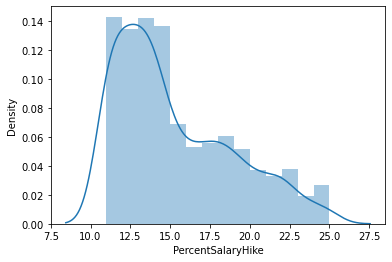

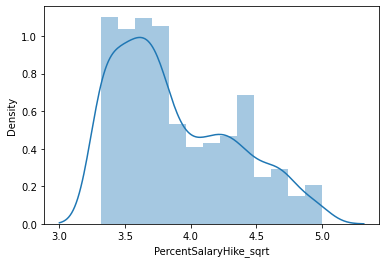

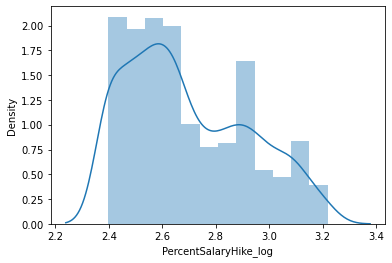

In [92]:
sb.distplot(df.PercentSalaryHike)
plt.show()
df['PercentSalaryHike_sqrt']=np.sqrt(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_sqrt)
plt.show()
df['PercentSalaryHike_log']=np.log(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_log)
plt.show()

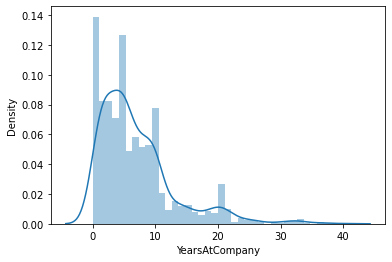

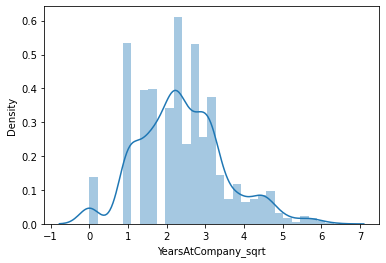

In [93]:
sb.distplot(df.YearsAtCompany)
plt.show()
df['YearsAtCompany_sqrt']=np.sqrt(df.YearsAtCompany)
sb.distplot(df.YearsAtCompany_sqrt)
plt.show()


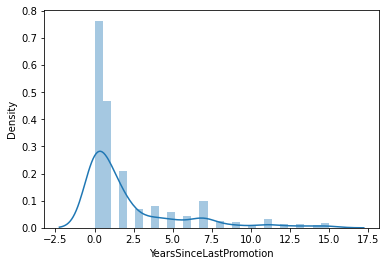

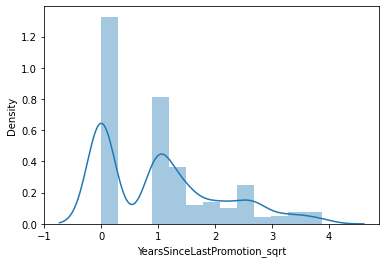

In [94]:
sb.distplot(df.YearsSinceLastPromotion)
plt.show()
df['YearsSinceLastPromotion_sqrt']=np.sqrt(df.YearsSinceLastPromotion)
sb.distplot(df.YearsSinceLastPromotion_sqrt)
plt.show()


# correlation through heatmap

<AxesSubplot:>

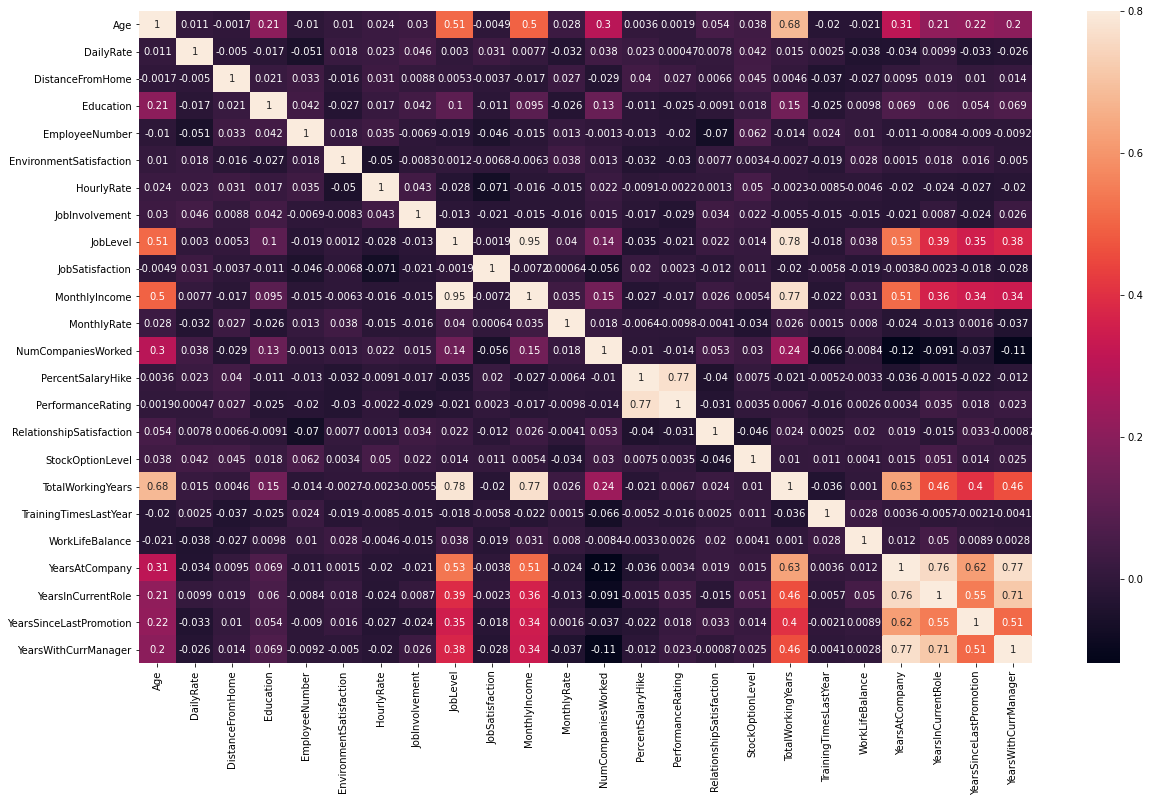

In [57]:
corr_heatmap= con_df.corr()
f, ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_heatmap,vmax=0.8,annot=True)

In [58]:
#show how mush % employees left the organizatin
df.Attrition.value_counts(normalize= True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot:>

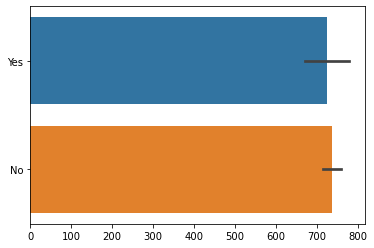

In [59]:
Attrition= df.Attrition.value_counts()
sb.barplot(x=df.Attrition.index,y=df.Attrition.values)

<AxesSubplot:ylabel='Attrition'>

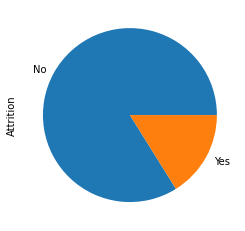

In [60]:
df['Attrition'].value_counts().plot(kind= "pie")

most of them is no so this is class imbalanced problem

In [61]:
df.OverTime.value_counts(normalize= True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

<AxesSubplot:>

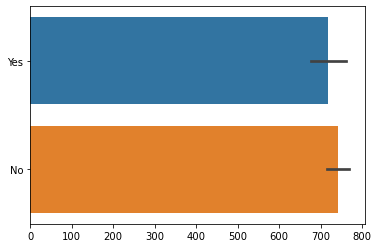

In [62]:
OverTime= df.Attrition.value_counts()
sb.barplot(x=df.OverTime.index,y=df.OverTime.values)

<AxesSubplot:ylabel='OverTime'>

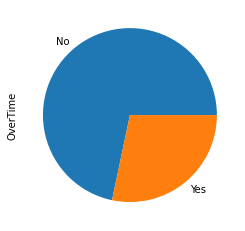

In [63]:
df['OverTime'].value_counts().plot(kind= "pie")

In [64]:
#Bar plots
BarPlot_columns=['Age', 'DistanceFromHome','JobInvolvement','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance', 'JobLevel' ,'TotalWorkingYears' , 'YearsInCurrentRole']

In [65]:
#method for performing bar plots
def Bar_plots(var):
    col = pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked= False , figsize=(8,4))
    plt.xticks(rotation=90)

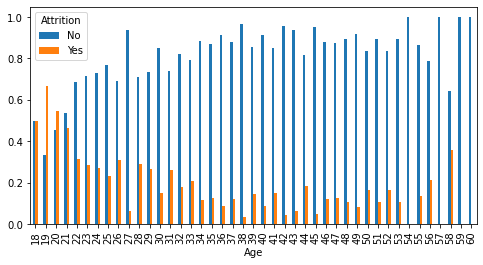

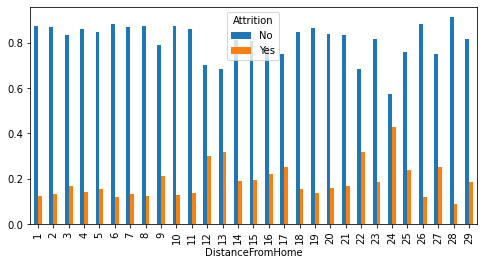

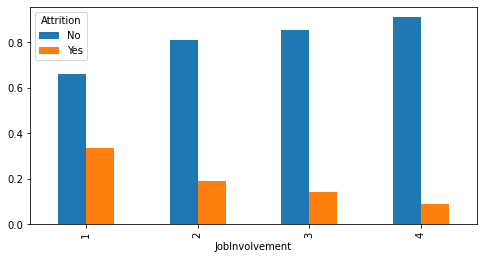

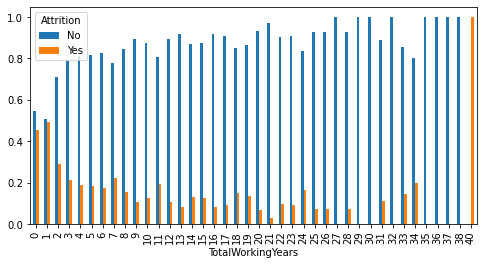

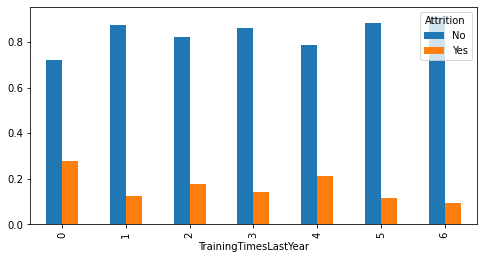

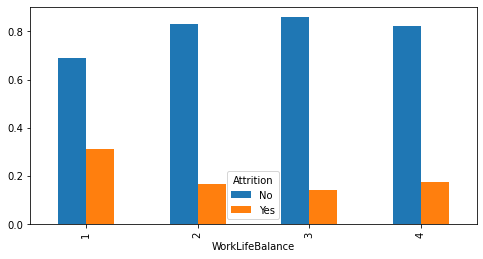

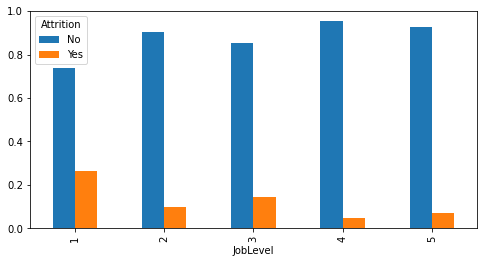

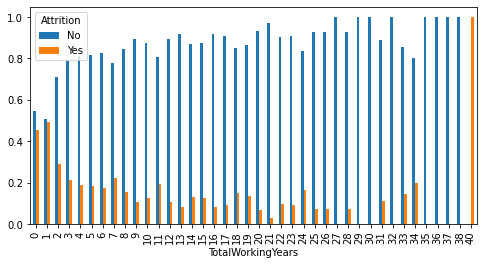

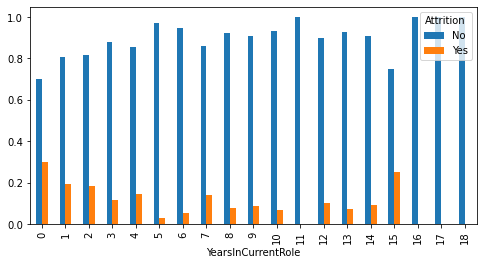

In [66]:
for col in BarPlot_columns:
    Bar_plots(col)

# Insights :
1- attrition is very high wih employees between 18 : 22 years old

2- attrition is more when distance of hte office is more from home

3- attrition is high with employees's education in HR field

4- employees wgo work overtime have high attrition than who didn't

5- emploees who are working less than 2 years have more attrition

# outliers checking and treatment

In [67]:
import numpy as np
from scipy import stats

In [68]:
z= np.abs(stats.zscore(df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EmployeeNumber', 'EnvironmentSatisfaction',
           'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel',
           'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]))
print(z)
threshold = 3 
print(np.where(z>3))

[[0.4463504  0.74252653 1.01090934 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 1.2977746  0.14714972 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   1.41436324 0.88751511 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 1.60518328 0.64072665 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.54667746 0.88751511 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.43256792 0.14714972 ... 0.33939374 0.36871529 0.59522723]]
(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1

In [69]:
print(z[0][0])

0.4463504035345031


In [70]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome_sqrt,DistanceFromHome_log,MonthlyIncome_sqrt,MonthlyIncome_log,PercentSalaryHike_sqrt,PercentSalaryHike_log,YearsAtCompany_sqrt,YearsSinceLastPromotion_sqrt
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,1.000000,0.000000,77.414469,8.698347,3.316625,2.397895,2.449490,0.000000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,2.828427,2.079442,71.624018,8.542861,4.795832,3.135494,3.162278,1.000000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1.414214,0.693147,45.716518,7.644919,3.872983,2.708050,0.000000,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,1.732051,1.098612,53.935146,7.975565,3.316625,2.397895,2.828427,1.732051
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,1.414214,0.693147,58.889727,8.151333,3.464102,2.484907,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,0,3,4.795832,3.135494,50.705029,7.852050,4.123106,2.833213,2.236068,0.000000
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,7,2.449490,1.791759,99.954990,9.209440,3.872983,2.708050,2.645751,1.000000
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,2.000000,1.386294,78.370913,8.722906,4.472136,2.995732,2.449490,0.000000
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,8,1.414214,0.693147,73.416619,8.592301,3.741657,2.639057,3.000000,0.000000


# removing outliers

In [71]:
df_out = df[(z<3).all(axis=1)]

In [77]:
df_out1 =df_out.drop(['DistanceFromHome_sqrt','DistanceFromHome_log',
                      'MonthlyIncome_sqrt','MonthlyIncome_log',
                      'PercentSalaryHike_sqrt','PercentSalaryHike_log'
                      ,'YearsAtCompany_sqrt','YearsSinceLastPromotion_sqrt'],axis=1)

In [78]:
df_out1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [79]:
df_out1.shape

(1387, 35)

dividing final dataset into categorical and continous variables

In [80]:
numerical_df= df_out1.select_dtypes(include=np.number)
categorical_df= df_out1.select_dtypes(exclude=np.number)
numeric_cols =list (numerical_df.columns)
categorical_cols = list(categorical_df.columns)

# converting categorical variables to binary

In [81]:
categorical_df_dummies= pd.get_dummies(df_out1[categorical_cols],drop_first= True)
final_df= pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,...,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,...,4,80,1,6,3,3,2,2,2,2


In [82]:
final_df.shape

(1387, 48)

# Creating models:

In [83]:
X=final_df[['BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely',
            'Department_Research & Development','Department_Sales',
            'EducationField_Life Sciences','EducationField_Marketing',
            'EducationField_Medical','EducationField_Other',
            'EducationField_Technical Degree','StockOptionLevel','TotalWorkingYears',
            'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
Y= final_df[['Attrition_Yes']]

# train - test - split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

RandomForestClassifier Model

In [95]:


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_depth=4)
model=rfc.fit(xtrain,ytrain)
pred= model.predict(xtest)

from sklearn.metrics import confusion_matrix ,accuracy_score
print('the confusion matrix \n',confusion_matrix(ytest['Attrition_Yes'],pred))
print('the accuracy of the RandomForestClassifier is',accuracy_score(ytest['Attrition_Yes'],pred))

the confusion matrix 
 [[345   0]
 [ 69   3]]
the accuracy of the RandomForestClassifier is 0.8345323741007195


In [85]:
model.feature_importances_

array([0.01508832, 0.01724884, 0.01470099, 0.02103635, 0.01286112,
       0.0272455 , 0.00696023, 0.00788538, 0.07139303, 0.12768878,
       0.25109045, 0.04157074, 0.0482744 , 0.07872812, 0.0509597 ,
       0.0412963 , 0.16597176])

<BarContainer object of 17 artists>

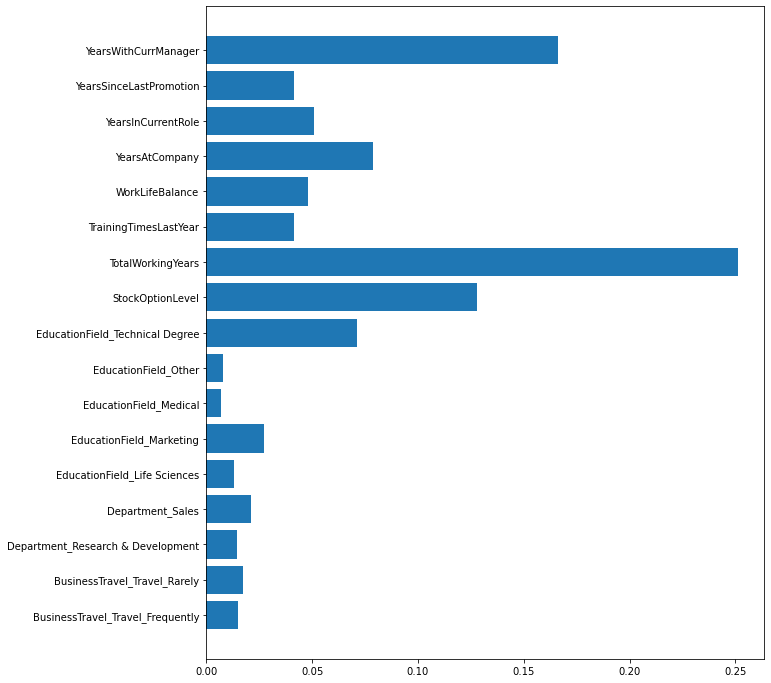

In [86]:
import matplotlib.pyplot as plt
f, ax =plt.subplots(figsize=(10,12))
plt.barh(X.columns,model.feature_importances_)

LogisticRegression Model

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
pred= model_lr.predict(xtest)

from sklearn.metrics import confusion_matrix ,accuracy_score
print('the confusion matrix \n',confusion_matrix(ytest['Attrition_Yes'],pred))
print('the accuracy of the LogisticRegression is',accuracy_score(ytest['Attrition_Yes'],pred))

the confusion matrix 
 [[343   2]
 [ 61  11]]
the accuracy of the LogisticRegression is 0.8489208633093526


DecisionTreeClassifier Model

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=4)
model_dtc=dtc.fit(xtrain,ytrain)
pred= model_dtc.predict(xtest)

from sklearn.metrics import confusion_matrix ,accuracy_score
print('the confusion matrix \n',confusion_matrix(ytest['Attrition_Yes'],pred))
print('the accuracy of the DecisionTreeClassifier is',accuracy_score(ytest['Attrition_Yes'],pred))

the confusion matrix 
 [[323  22]
 [ 60  12]]
the accuracy of the DecisionTreeClassifier is 0.8033573141486811
